In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

In [2]:
import warnings
from collections import Counter
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_log_error, accuracy_score
#import xgboost as xgb
#import lightgbm as lgb

In [3]:
df_train = pd.read_csv("C:/Users/siddi/Desktop/Springboard/Dataset/train.csv")
df_test = pd.read_csv("C:/Users/siddi/Desktop/Springboard/Dataset/test.csv")

In [4]:
df_train.shape
df_test.shape

(4398, 22)

# EDA

## Belongs to collection

In [5]:
df_train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [6]:
df_test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [7]:
df_train.drop(['belongs_to_collection'], axis=1, inplace=True)
df_test.drop(['belongs_to_collection'], axis=1, inplace=True)

## Genres 

In [8]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [9]:
gn = pd.DataFrame(columns=['genre_name'])
gn

,genre_name


In [10]:
df_train = pd.concat([df_train, gn], axis=1)
df_train.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,NaN
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,NaN
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,NaN
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,NaN
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN


In [11]:
df_test = pd.concat([df_test, gn], axis=1)
df_test.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,genre_name
0,3001,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,...,7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",NaN
1,3002,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,...,5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",NaN
2,3003,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,...,5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",NaN
3,3004,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,...,9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",NaN
4,3005,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,...,2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",NaN


In [12]:
# Adding the genre_name column to both training and testing dataset
j = 0
for i in df_train['genres']:
    d = get_dict(i)
    if d != {}:
        df_train['genre_name'][j] = d[0]['name'] 
    else:
         df_train['genre_name'][j] = np.NaN
    j += 1

j = 0
for i in df_test['genres']:
    d = get_dict(i)
    if d != {}:
        df_test['genre_name'][j] = d[0]['name'] 
    else:
         df_test['genre_name'][j] = np.NaN
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWith

In [13]:
df_train.columns

Index(['id', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'genre_name'],
      dtype='object')

In [14]:
#Dropping the genres column
df_train.drop(['genres'], axis=1, inplace=True)
df_test.drop(['genres'], axis=1, inplace=True)

## Budget

In [21]:
df_train[df_train['budget'] == 0].shape[0]

812

In [22]:
df_train['budget'].unique()

array([ 14000000,  40000000,   3300000,   1200000,         0,   8000000,
         6000000,   1000000,  15000000,  53000000, 102000000,    500000,
        26000000,  32000000,  80000000,   4000000,  10000000,  11000000,
        45000000,  13000000,  90000000, 140000000,  30000000,  50000000,
         3800000,   3000000,  25000000,   3906840,  44000000,  38000000,
          560000,  12000000,  20000000, 125000000, 150000000,   5000000,
         1500000,   2000000,  85000000,  29000000,    445000,  17000000,
        10284523,  43000000,  28000000,   7500000,  35000000,   2500000,
        10500000,   7000000,  60000000,  10900000,  31000000,  72000000,
        75000000, 100000000,  93000000,  12716953,  18000000,   2400000,
        65000000,   9000000, 110000000,  14320000,   3500000,  39200000,
        63600000,    125000,  19000000,  12468389,  82500000,    259000,
       180000000,   4500000,  24000000,  12600000,  55000000,   3200000,
        22000000,   6700000,   2600000,  49000000, 

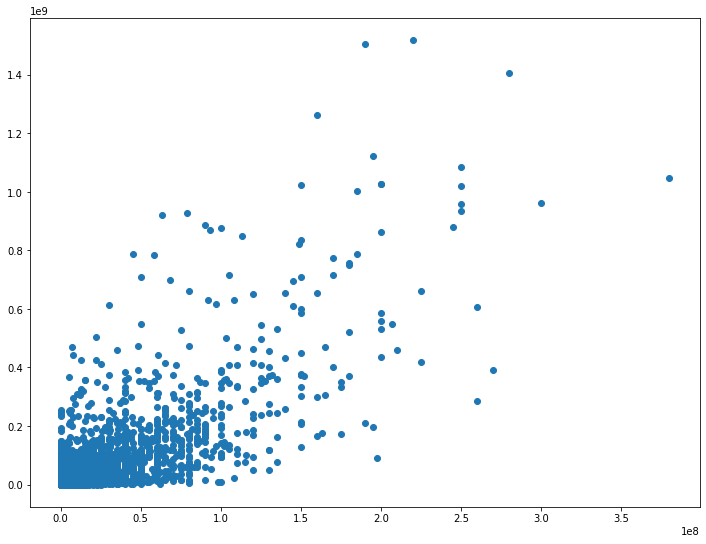

In [16]:
plt.subplots(figsize=(12, 9))
plt.scatter(x=df_train['budget'], y=df_train['revenue'])

## Homepage

In [17]:
df_train['homepage'].value_counts(dropna=False)

NaN                                                     2054
http://www.transformersmovie.com/                          4
http://www.lordoftherings.net/                             2
http://www.thehobbit.com/                                  2
http://www.feastoflovefilm.com/                            1
                                                        ... 
http://www.happythankyoumoreplease.com/                    1
http://www.sukiyakimovie.com/                              1
http://www.mgm.com/view/movie/234/Quantum-of-Solace/       1
http://www.theasylum.cc/product.php?id=203                 1
http://www.fidothemovie.com/                               1
Name: homepage, Length: 942, dtype: int64

In [18]:
has_hompage = pd.DataFrame(columns=['has_homepage'])

In [19]:
#adding the has_homepage column
df_train = pd.concat([df_train, has_hompage], axis=1)
df_test = pd.concat([df_test, has_hompage], axis=1)

In [24]:
#If no homepage then has_homepage = 0 else has_homepage = 1
j = 0
for i in df_train['homepage']:
    if str(df_train['homepage'][j]) == 'nan':
        df_train['has_homepage'][j] = 0
    else:
        df_train['has_homepage'][j] = 1
    j += 1

j = 0
for i in df_test['homepage']:
    if str(df_test['homepage'][j]) == 'nan':
        df_test['has_homepage'][j] = 0
    else:
        df_test['has_homepage'][j] = 1
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\siddi\Anaconda3\lib\site-packages

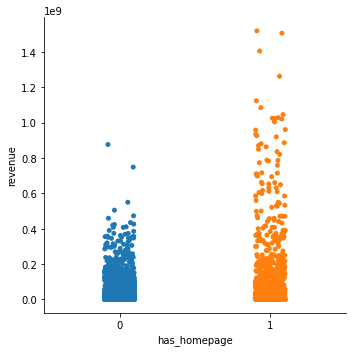

In [32]:
sns.catplot(x='has_homepage', y='revenue', data=df_train)
#plot shows having a homepage affects the revenue

## IMDB Id

In [34]:
df_train['imdb_id']

0       tt2637294
1       tt0368933
2       tt2582802
3       tt1821480
4       tt1380152
          ...    
2995    tt0109403
2996    tt2364975
2997    tt0116908
2998    tt0343135
2999    tt1600195
Name: imdb_id, Length: 3000, dtype: object

In [39]:
df_train.drop(['imdb_id'], axis=1, inplace=True)
df_test.drop(['imdb_id'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 21), (4398, 20))

## Original Language 

In [42]:
print(len(df_train['original_language'].value_counts(dropna=False)))
df_train['original_language'].value_counts(dropna=False)

36


en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
te       2
fi       2
pl       2
ml       2
no       2
sr       1
cs       1
id       1
el       1
ar       1
nb       1
vi       1
bn       1
ur       1
mr       1
he       1
Name: original_language, dtype: int64

In [43]:
print(len(df_test['original_language'].value_counts(dropna=False)))
df_test['original_language'].value_counts(dropna=False)

39


en    3776
fr     121
hi      76
ru      62
ja      53
es      52
it      32
de      31
ko      29
zh      27
cn      21
ta      15
da      12
sv      12
ml      10
te       7
pt       7
tr       6
he       5
th       5
nl       5
ro       5
no       3
pl       3
el       2
sr       2
id       2
fi       2
xx       2
cs       2
bn       2
bm       2
ur       1
af       1
kn       1
ca       1
ka       1
is       1
hu       1
Name: original_language, dtype: int64

<AxesSubplot:xlabel='original_language', ylabel='revenue'>

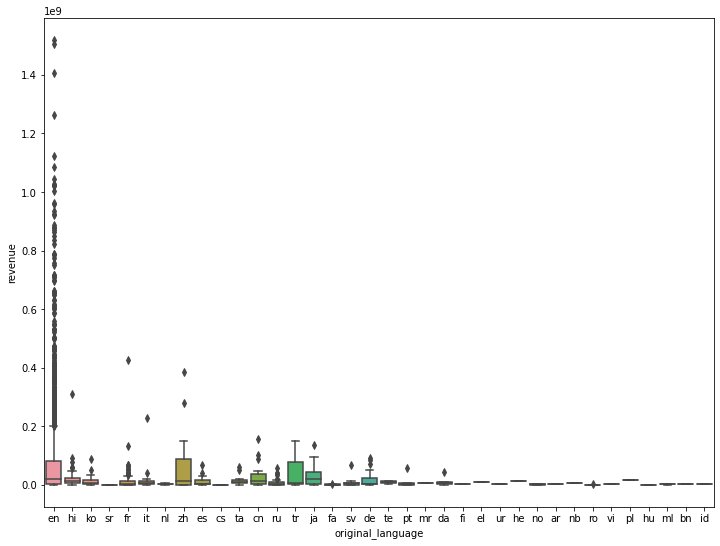

In [45]:
plt.subplots(figsize=(12, 9))
sns.boxplot(x = df_train['original_language'], y = df_train['revenue'])

### find movies with original language english

In [46]:
isOrgEn = pd.DataFrame(columns=['is_en_original_language'])
df_train = pd.concat([df_train, isOrgEn], axis=1)
df_test = pd.concat([df_test, isOrgEn], axis=1)

print(df_train['original_language'][0])

en


In [47]:
#If english is original language then is_en_original_language = 1 else it is 0
j = 0
for i in df_train['original_language']:
    if i == 'en':
        df_train['is_en_original_language'][j] = 1
    else:
        df_train['is_en_original_language'][j] = 0
    j += 1
    
j = 0
for i in df_test['original_language']:
    if i == 'en':
        df_test['is_en_original_language'][j] = 1
    else:
        df_test['is_en_original_language'][j] = 0
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_lau

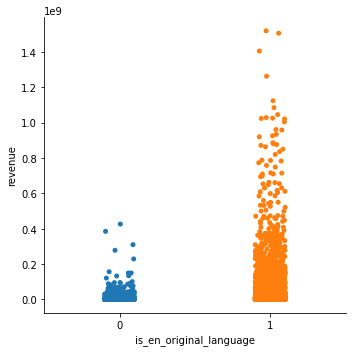

In [48]:
#English language generates higher revenue
sns.catplot(x='is_en_original_language', y='revenue', data=df_train)

## Original title

In [49]:
len(df_train['original_title'].value_counts())

2975

In [50]:
df_train.drop(['original_title'], axis=1, inplace=True)
df_test.drop(['original_title'], axis=1, inplace=True)

## Overview

In [52]:
for i in range(5): 
    print(df_train['overview'][i])
    print("--------------------")

When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.
--------------------
Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess. Her best friend Lilly also joins her for the summer. Mia continues her 'princess lessons'- riding horses side-saddle, archery, and other royal. But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected...
--------------------
Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfection at any cost, even his humanity.
--------------------
Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagchi. Seven months pregnant and alone in a festive city, she begins a relentless search for her husband. With nothing to rely on except fragments from her memorie

In [53]:
df_train.drop(['overview'], axis=1, inplace=True)
df_test.drop(['overview'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 20), (4398, 19))

## Popularity

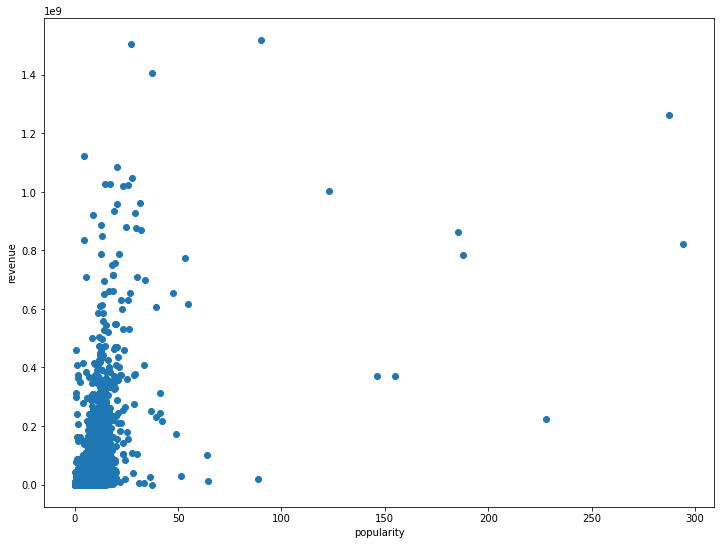

In [54]:
plt.subplots(figsize=(12, 9))
# sns.catplot(x='revenue', y='popularity', data=train)
plt.scatter(x = df_train['popularity'], y = df_train['revenue'])
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.show()

## Poster Path

In [55]:
df_train.drop(['poster_path'], axis=1, inplace=True)
df_test.drop(['poster_path'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 19), (4398, 18))

## Production Companies 

In [56]:
for i in range(5):
    print(df_train['production_companies'][i])
    print("-------")

[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
-------
[{'name': 'Walt Disney Pictures', 'id': 2}]
-------
[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
-------
nan
-------
nan
-------


In [58]:
num_prod_com = pd.DataFrame(columns=['num_production_companies'])
df_train = pd.concat([df_train, num_prod_com], axis=1)
df_test = pd.concat([df_test, num_prod_com], axis=1)

In [59]:
d = get_dict(df_train['production_companies'][0])
# This has 3 production companies
print(len(d))
d

3


[{'name': 'Paramount Pictures', 'id': 4},
 {'name': 'United Artists', 'id': 60},
 {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]

In [60]:
j = 0
for i in df_train['production_companies']:
    d = get_dict(i)
    if len(d) != 0:
        df_train['num_production_companies'][j] = len(d)
    else:
        df_train['num_production_companies'][j] = np.NaN
    j += 1

j = 0
for i in df_test['production_companies']:
    d = get_dict(i)
    if len(d) != 0:
        df_test['num_production_companies'][j] = len(d)
    else:
        df_test['num_production_companies'][j] = np.NaN
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_la

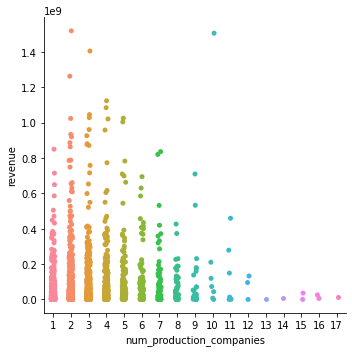

In [61]:
sns.catplot(x='num_production_companies', y='revenue', data = df_train)

## Production Company

In [62]:
list_of_companies = []
for i in df_train['production_companies']:
    d = get_dict(i)
    if d != {}:
        for j in range(len(d)):
            list_of_companies.append(d[j]['name'])
list_of_companies

['Paramount Pictures',
 'United Artists',
 'Metro-Goldwyn-Mayer (MGM)',
 'Walt Disney Pictures',
 'Bold Films',
 'Blumhouse Productions',
 'Right of Way Films',
 'Ghost House Pictures',
 'North Box Productions',
 'Walt Disney Pictures',
 'Jim Henson Productions',
 'Jim Henson Company, The',
 'Castle Rock Entertainment',
 'United Artists',
 'Twentieth Century Fox Film Corporation',
 'Amercent Films',
 'American Entertainment Partners L.P.',
 'Interscope Communications',
 'DreamWorks SKG',
 'Jinks/Cohen Company',
 'Double Feature Films',
 'Jersey Films',
 'Nina Saxon Film Design',
 'Metro-Goldwyn-Mayer (MGM)',
 'DreamWorks SKG',
 'Cruise/Wagner Productions',
 'Amblin Entertainment',
 'Twentieth Century Fox Film Corporation',
 'Blue Tulip Productions',
 'Ronald Shusett/Gary Goldman',
 'Digital Image Associates',
 'Hypnopolis',
 'DreamWorks SKG',
 'Craven-Maddalena Films',
 'BenderSpink',
 'BBC Films',
 'Headline Pictures',
 'Magnolia Mae Films',
 'Taeoo Entertainment',
 'UK Film Council',

In [63]:
# Top 50 production companies
top_companies_cnt = list(Counter(list_of_companies).most_common(50))
top_companies = []
for i in top_companies_cnt:
    top_companies.append(i[0])
temp = 0
for i in top_companies_cnt:
    temp += i[1]
temp

2119

In [64]:
print(top_companies_cnt)

[('Warner Bros.', 202), ('Universal Pictures', 188), ('Paramount Pictures', 161), ('Twentieth Century Fox Film Corporation', 138), ('Columbia Pictures', 91), ('Metro-Goldwyn-Mayer (MGM)', 84), ('New Line Cinema', 75), ('Touchstone Pictures', 63), ('Walt Disney Pictures', 62), ('Columbia Pictures Corporation', 61), ('TriStar Pictures', 53), ('Relativity Media', 48), ('Canal+', 46), ('United Artists', 44), ('Miramax Films', 40), ('Village Roadshow Pictures', 36), ('Regency Enterprises', 31), ('BBC Films', 30), ('Dune Entertainment', 30), ('Working Title Films', 30), ('Fox Searchlight Pictures', 29), ('StudioCanal', 28), ('Lionsgate', 28), ('DreamWorks SKG', 27), ('Fox 2000 Pictures', 25), ('Summit Entertainment', 24), ('Hollywood Pictures', 24), ('Orion Pictures', 24), ('Amblin Entertainment', 23), ('Dimension Films', 23), ('Castle Rock Entertainment', 21), ('Epsilon Motion Pictures', 21), ('Morgan Creek Productions', 21), ('Original Film', 21), ('Focus Features', 21), ('Legendary Pictur

In [65]:
print(top_companies)

['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema', 'Touchstone Pictures', 'Walt Disney Pictures', 'Columbia Pictures Corporation', 'TriStar Pictures', 'Relativity Media', 'Canal+', 'United Artists', 'Miramax Films', 'Village Roadshow Pictures', 'Regency Enterprises', 'BBC Films', 'Dune Entertainment', 'Working Title Films', 'Fox Searchlight Pictures', 'StudioCanal', 'Lionsgate', 'DreamWorks SKG', 'Fox 2000 Pictures', 'Summit Entertainment', 'Hollywood Pictures', 'Orion Pictures', 'Amblin Entertainment', 'Dimension Films', 'Castle Rock Entertainment', 'Epsilon Motion Pictures', 'Morgan Creek Productions', 'Original Film', 'Focus Features', 'Legendary Pictures', 'Participant Media', 'Blumhouse Productions', 'New Regency Pictures', 'Film4', 'Spyglass Entertainment', 'Imagine Entertainment', 'Screen Gems', 'Millennium Films', 'TSG Entertainment', 'Lakeshore Entertainment

In [66]:
prod_company = pd.DataFrame(columns=['production_company'])
df_train = pd.concat([df_train, prod_company], axis=1)
df_test = pd.concat([df_test, prod_company], axis=1)

In [68]:
j = 0
cnt = 0
chk = False
for i in df_train['production_companies']:
    d = get_dict(i)
#     print(len(d))
    if d != {}:
        if len(d) > 1:
            for k in range(len(d)):
                company_name = d[k]['name']
                if company_name in top_companies:
                    df_train['production_company'][j] = company_name
                    cnt += 1
                    chk = True
                    break
            
            if chk is False:
                    df_train['production_company'][j] = d[0]['name']
                
        else:
            df_train['production_company'][j] = d[0]['name']
    else:
        df_train['production_company'][j] = np.NaN
    j += 1

print("THE NUMBER OF TOP COMPANIES AT TRAIN:", cnt)

j = 0
cnt = 0
chk = False
for i in df_test['production_companies']:
    d = get_dict(i)
#     print(len(d))
    if d != {}:
        if len(d) > 1:
            for k in range(len(d)):
                company_name = d[k]['name']
                if company_name in top_companies:
                    df_test['production_company'][j] = company_name
                    cnt += 1
                    chk = True
                    break
            
            if chk is False:
                    df_test['production_company'][j] = d[0]['name']
                
        else:
            df_test['production_company'][j] = d[0]['name']
    else:
        df_test['production_company'][j] = np.NaN
    j += 1

print("THE NUMBER OF TOP COMPANIES AT TEST:", cnt)

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


THE NUMBER OF TOP COMPANIES AT TRAIN: 1313


C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


THE NUMBER OF TOP COMPANIES AT TEST: 1869


In [70]:
df_train['production_company'].value_counts(dropna=False)

NaN                                       912
Universal Pictures                        173
Paramount Pictures                        161
Warner Bros.                              137
Twentieth Century Fox Film Corporation    133
                                         ... 
Columbia Pictures Industries                1
Cinema 77                                   1
Concorde Pictures                           1
Likely Story                                1
The Universal Film Mfg. Co.                 1
Name: production_company, Length: 421, dtype: int64

In [72]:
#Production companies does not look like a useful column
df_train.drop(['production_companies', 'production_company'], axis=1, inplace=True)
df_test.drop(['production_companies', 'production_company'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 19), (4398, 18))

## Production Country

In [74]:
prod_country = pd.DataFrame(columns=['production_country'])
df_train = pd.concat([df_train, prod_country], axis=1)
df_test = pd.concat([df_test, prod_country], axis=1)

In [76]:
j = 0
for i in df_train['production_countries']:
    d = get_dict(i)
    if d != {}:
        if len(d) > 1:
            countries = []
            for k in range(len(d)):
                countries.append(d[k]['name'])
            if 'United States of America' in countries:
                df_train['production_country'][j] = 'United States of America'
        else:
            df_train['production_country'][j] = d[0]['name']
    else:
        df_train['production_country'][j] = np.NaN
    j += 1
    
j = 0
for i in df_test['production_countries']:
    d = get_dict(i)
    if d != {}:
        if len(d) > 1:
            countries = []
            for k in range(len(d)):
                countries.append(d[k]['name'])
            if 'United States of America' in countries:
                df_test['production_country'][j] = 'United States of America'
        else:
            df_test['production_country'][j] = d[0]['name']
    else:
        df_test['production_country'][j] = np.NaN
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\siddi\Anac

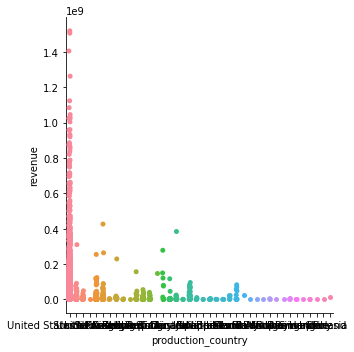

In [77]:
sns.catplot(x = 'production_country', y = 'revenue', data = df_train)

In [78]:
#Movies produced in USA might produce more revenue
is_usa_production = pd.DataFrame(columns=['is_usa_production'])
df_train = pd.concat([df_train, is_usa_production], axis=1)
df_test = pd.concat([df_test, is_usa_production], axis=1)

In [79]:
j = 0
for i in df_train['production_country']:
    if i == 'United States of America':
        df_train['is_usa_production'][j] = 1
    elif str(i) == 'nan':
        df_train['is_usa_production'][j] = np.NaN
    else:
        df_train['is_usa_production'][j] = 0
    j += 1
    
j = 0
for i in df_test['production_country']:
    if i == 'United States of America':
        df_test['is_usa_production'][j] = 1
    elif str(i) == 'nan':
        df_test['is_usa_production'][j] = np.NaN
    else:
        df_test['is_usa_production'][j] = 0
    
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_laun

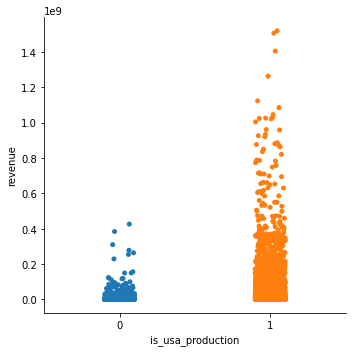

In [80]:
sns.catplot(x = 'is_usa_production', y = 'revenue', data = df_train)

In [81]:
df_train.drop(['production_countries'], axis=1, inplace=True)
df_test.drop(['production_countries'], axis=1, inplace=True)

## Release Date

In [82]:
#Split the Release date to Release Day, Release Month, Release Year
df_train[['release_month', 'release_day', 'release_year']] = df_train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
df_test[['release_month', 'release_day', 'release_year']] = df_test['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)


In [85]:
df_train.drop(['release_date'], axis=1, inplace=True)
df_test.drop(['release_date'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 22), (4398, 21))

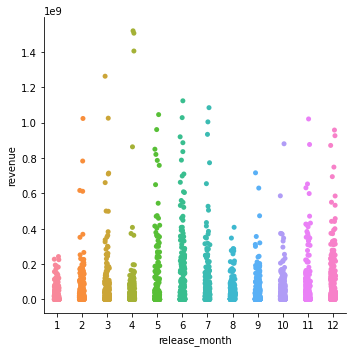

In [87]:
sns.catplot(x='release_month', y='revenue', data = df_train)

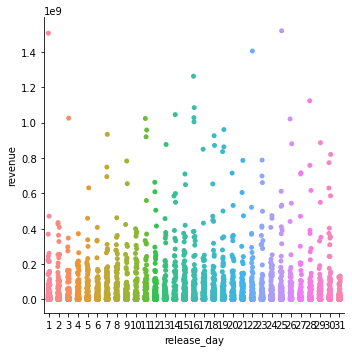

In [88]:
sns.catplot(x = 'release_day', y = 'revenue', data = df_train)

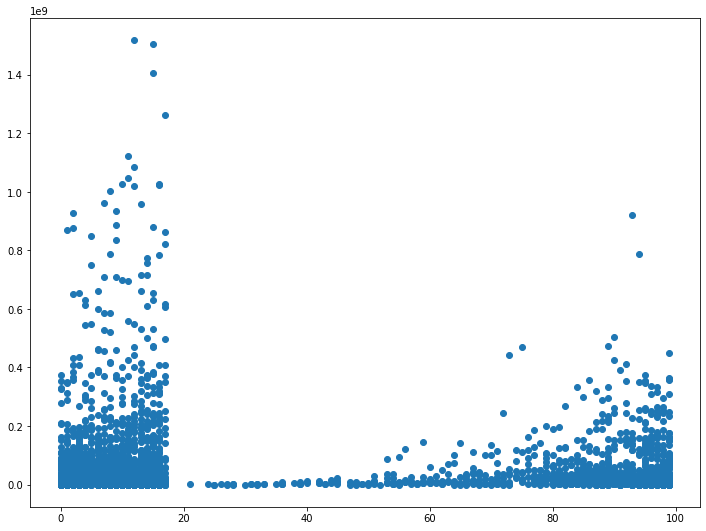

In [89]:
plt.subplots(figsize=(12, 9))
plt.scatter(x = df_train['release_year'], y = df_train['revenue'])

## Runtime

In [90]:
print(df_train['runtime'].isnull().sum())
print(df_test['runtime'].isnull().sum())

2
4


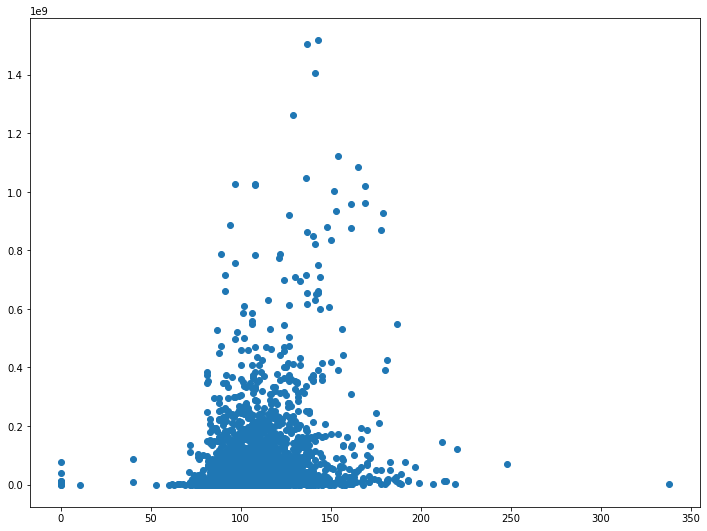

In [91]:
plt.subplots(figsize=(12, 9))
plt.scatter(x = df_train['runtime'], y = df_train['revenue'])

In [93]:
# Zero running time means null value
print(len(df_train[df_train['runtime'] == 0]))

12


In [94]:
df_train['spoken_languages'][:5]

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

## Number of spoken languages

In [95]:
number_of_spoken_languages = pd.DataFrame(columns=['number_of_spoken_languages'])
df_train = pd.concat([df_train, number_of_spoken_languages], axis=1)
df_test = pd.concat([df_test, number_of_spoken_languages], axis=1)

In [96]:
j = 0
for i in df_train['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        df_train['number_of_spoken_languages'][j] = len(d)
    else:
        df_train['number_of_spoken_languages'][j] = np.NaN
    j += 1
    
j = 0
for i in df_test['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        df_test['number_of_spoken_languages'][j] = len(d)
    else:
        df_test['number_of_spoken_languages'][j] = np.NaN
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWith

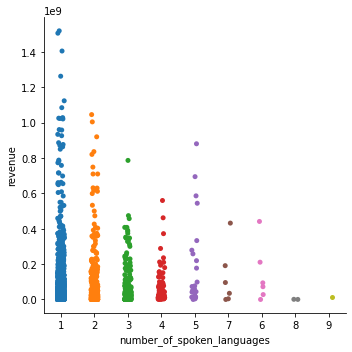

In [97]:
sns.catplot(x = 'number_of_spoken_languages', y = 'revenue', data = df_train)

## Is english a spoken language 

In [98]:
is_en_spoken = pd.DataFrame(columns=['is_en_spoken'])
df_train = pd.concat([df_train, is_en_spoken], axis=1)
df_test = pd.concat([df_test, is_en_spoken], axis=1)

In [99]:
j = 0
for i in df_train['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        langs = []
        for k in range(len(d)):
            lang = d[k]['name']
            langs.append(lang)
        if 'English' in langs:
            df_train['is_en_spoken'][j] = 1
        else:
            df_train['is_en_spoken'][j] = 0
    else:
        df_train['is_en_spoken'][j] = np.NaN
    j += 1
        
j = 0
for i in df_test['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        langs = []
        for k in range(len(d)):
            lang = d[k]['name']
            langs.append(lang)
        if 'English' in langs:
            df_test['is_en_spoken'][j] = 1
        else:
            df_test['is_en_spoken'][j] = 0
    else:
        df_test['is_en_spoken'][j] = np.NaN
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anac

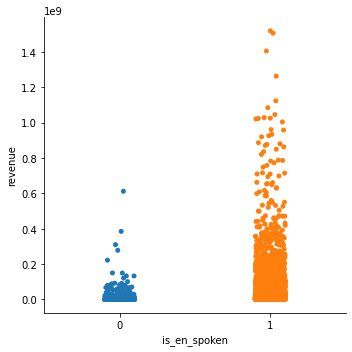

In [100]:
sns.catplot(x='is_en_spoken', y='revenue', data = df_train)

## Spoken language

In [101]:
spoken_language = pd.DataFrame(columns=['spoken_language'])
df_train = pd.concat([df_train, spoken_language], axis=1)
df_test = pd.concat([df_test, spoken_language], axis=1)

In [102]:
j = 0
for i in df_train['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        langs = []
        for k in range(len(d)):
            lang = d[k]['name']
            langs.append(lang)
        if 'English' in langs:
            df_train['spoken_language'][j] = 'English'
        else:
            df_train['spoken_language'][j] = langs[0]
    else:
        df_train['spoken_language'][j] = np.NaN
    j += 1
    
j = 0
for i in df_test['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        langs = []
        for k in range(len(d)):
            lang = d[k]['name']
            langs.append(lang)
        if 'English' in langs:
            df_test['spoken_language'][j] = 'English'
        else:
            df_test['spoken_language'][j] = langs[0]
    else:
        df_test['spoken_language'][j] = np.NaN
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anac

In [103]:
print(len(df_train['spoken_language'].value_counts()))
print(len(df_test['spoken_language'].value_counts()))

34
41


C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47568 missing from c

C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\siddi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47568 missing from current fon

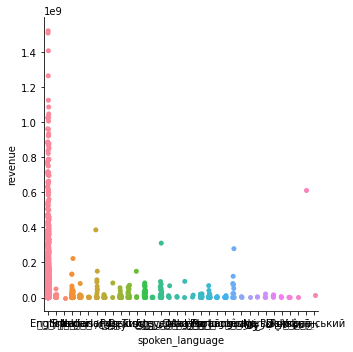

In [104]:
sns.catplot(x='spoken_language', y='revenue', data = df_train)

In [105]:
df_train.drop(['spoken_languages'], axis=1, inplace=True)
df_test.drop(['spoken_languages'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 24), (4398, 23))

## Status

In [106]:
print(df_train['status'].value_counts(dropna=False))
print(df_test['status'].value_counts(dropna=False))

Released    2996
Rumored        4
Name: status, dtype: int64
Released           4389
Post Production       5
NaN                   2
Rumored               2
Name: status, dtype: int64


## Is Released

In [107]:
is_released = pd.DataFrame(columns=['is_released'])
df_train = pd.concat([df_train, is_released], axis=1)
df_test = pd.concat([df_test, is_released], axis=1)

In [108]:
# if status == 'Released' assign is_released = 1 else is_released = 0
j = 0
for i in df_train['status']:
    if i == 'Released':
        df_train['is_released'][j] = 1
    else:
        df_train['is_released'][j] = 0
    j += 1
    
j = 0
for i in df_test['status']:
    if i == 'Released':
        df_test['is_released'][j] = 1
    else:
        df_test['is_released'][j] = 0
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\siddi\Anaconda3\lib\site-p

In [109]:
print(df_train['is_released'].value_counts(dropna=False))
print(df_test['is_released'].value_counts(dropna=False))

1    2996
0       4
Name: is_released, dtype: int64
1    4389
0       9
Name: is_released, dtype: int64


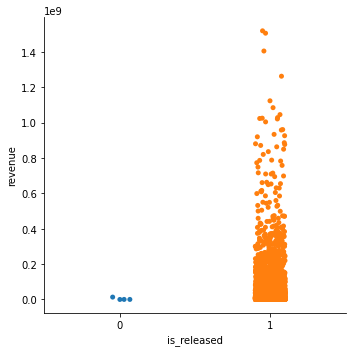

In [110]:
sns.catplot(x='is_released', y='revenue', data = df_train)

In [111]:
df_train.drop(['status'], axis=1, inplace=True)
df_test.drop(['status'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 24), (4398, 23))

## Tagline

In [112]:
df_train['tagline'][:10]

0    The Laws of Space and Time are About to be Vio...
1    It can take a lifetime to find true love; she'...
2      The road to greatness can take you to the edge.
3                                                  NaN
4                                                  NaN
5                                                  NaN
6                 Fear The Demon That Doesn't Fear God
7                Different channels. Different truths.
8                          Set sail for Muppet mayhem!
9             Back together for the first time, again.
Name: tagline, dtype: object

In [113]:
df_train.drop(['tagline'], axis=1, inplace=True)
df_test.drop(['tagline'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 23), (4398, 22))

In [114]:
for i in range(10): 
    print(df_train['Keywords'][i])
    print("-------")

[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
-------
[{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
-------
[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
-------
[{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220

In [115]:
keyword = pd.DataFrame(columns=['keyword'])
df_train = pd.concat([df_train, keyword], axis=1)
df_test = pd.concat([df_test, keyword], axis=1)

In [116]:
j = 0
for i in df_train['Keywords']:
    d = get_dict(i)
    if d != {}:
        df_train['keyword'][j] = d[0]['name']
    else:
        df_train['keyword'][j] = np.NaN
    j += 1
    
j = 0
for i in df_test['Keywords']:
    d = get_dict(i)
    if d != {}:
        df_test['keyword'][j] = d[0]['name']
    else:
        df_test['keyword'][j] = np.NaN
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWith

In [117]:
df_train['keyword'].value_counts(dropna = False)

NaN                 276
based on novel       56
independent film     42
prison               41
new york             40
                   ... 
religious cult        1
song                  1
mine                  1
prom                  1
new identity          1
Name: keyword, Length: 1029, dtype: int64

In [118]:
df_train.drop(['Keywords', 'keyword'], axis=1, inplace=True)
df_test.drop(['Keywords', 'keyword'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 22), (4398, 21))

## Cast

In [120]:
print(df_train['cast'][0])

[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character'

## Size of cast / Number of actors

In [121]:
size_of_cast = pd.DataFrame(columns=['size_of_cast'])
df_train = pd.concat([df_train, size_of_cast], axis=1)
df_test = pd.concat([df_test, size_of_cast], axis=1)

In [122]:
j = 0
for i in df_train['cast']:
    d = get_dict(i)
    if d != {}:
        df_train['size_of_cast'][j] = len(d)
    else:
        df_train['size_of_cast'][j] = np.NaN
    j += 1
    
j = 0
for i in df_test['cast']:
    d = get_dict(i)
    if d != {}:
        df_test['size_of_cast'][j] = len(d)
    else:
        df_test['size_of_cast'][j] = np.NaN
    j += 1

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWith

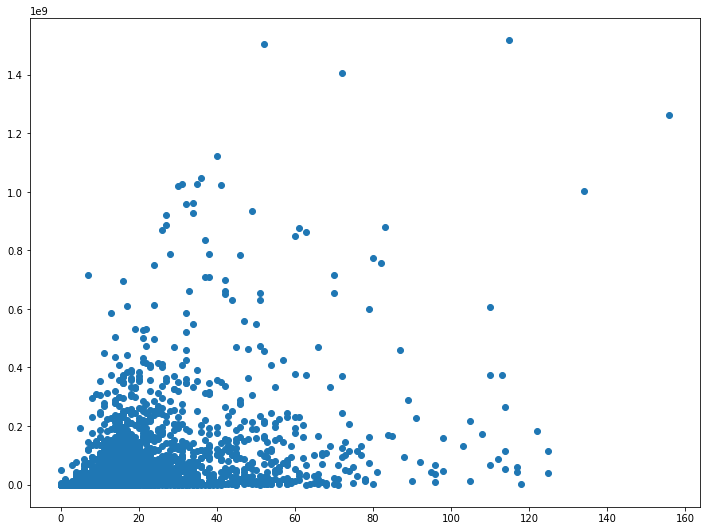

In [123]:
plt.subplots(figsize=(12, 9))
plt.scatter(x = df_train['size_of_cast'], y = df_train['revenue'])

In [124]:
df_train.drop(['cast'], axis=1, inplace=True)
df_test.drop(['cast'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 22), (4398, 21))

## Title and Crew

In [125]:
df_train.drop(['id', 'crew', 'title'], axis=1, inplace=True)
df_test.drop(['id', 'crew', 'title'], axis=1, inplace=True)
df_train.shape, df_test.shape

((3000, 19), (4398, 18))

## Dealing with null values in all columns

In [126]:
# Budget
print(df_train['budget'].isnull().sum())
print(df_test['budget'].isnull().sum())
print(len(df_train[df_train['budget'] == 0]))
print(len(df_test[df_test['budget'] == 0]))

0
0
812
1211


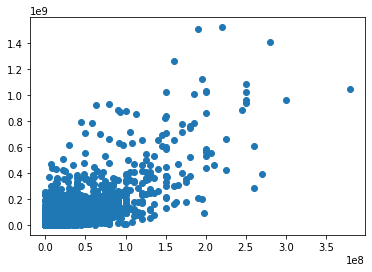

In [127]:
plt.scatter(x = df_train['budget'], y = df_train['revenue'])

In [128]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
all_data = pd.concat([df_train, df_test], axis=0)
df_train.shape, df_test.shape, all_data.shape

((3000, 19), (4398, 18), (7398, 19))

In [131]:
all_data['budget'].dtype

dtype('int64')

In [132]:
all_data['budget'] = all_data['budget'].replace(0, all_data['budget'].mean())

In [133]:
#Original Language
print(all_data['original_language'].isnull().sum())
print(len(all_data[all_data['original_language'] == 0]))

0
0


In [134]:
#Popularity
print(all_data['popularity'].isnull().sum())
print(len(all_data[all_data['popularity'] == 0]))

0
0


In [136]:
#Runtime
print(all_data['runtime'].isnull().sum())
print(len(all_data[all_data['runtime'] == 0]))
all_data['runtime'].mean()

6
21


107.7172619047619

In [138]:
all_data['runtime'] = all_data['runtime'].replace(0, all_data['runtime'].mean())
all_data['runtime'] = all_data['runtime'].fillna(all_data['runtime'].mean())

In [139]:
#Genre Name
print(all_data['genre_name'].isnull().sum())
print(len(all_data[all_data['genre_name'] == 0]))

23
0


In [140]:
print(all_data['genre_name'].value_counts())

Drama              1934
Comedy             1568
Action             1195
Adventure           474
Horror              403
Crime               333
Thriller            259
Animation           188
Documentary         188
Fantasy             182
Romance             176
Science Fiction     116
Mystery              91
Family               79
War                  50
Music                49
Western              44
History              39
Foreign               6
TV Movie              1
Name: genre_name, dtype: int64


In [141]:
all_data['genre_name'] = all_data['genre_name'].fillna(all_data['genre_name'].mode()[0])

In [142]:
#Number of production companies
print(all_data['num_production_companies'].isnull().sum())
print(len(all_data[all_data['num_production_companies'] == 0]))

414
0


In [143]:
all_data['num_production_companies'] = all_data['num_production_companies'].fillna(all_data['num_production_companies'].mean().round())

In [144]:
df_train.head()

,budget,original_language,popularity,runtime,revenue,genre_name,has_homepage,is_en_original_language,num_production_companies,production_country,is_usa_production,release_month,release_day,release_year,number_of_spoken_languages,is_en_spoken,spoken_language,is_released,size_of_cast
0,14000000,en,6.575393,93.0,12314651,Comedy,0,1,3,United States of America,1,2,20,15,1,1,English,1,24
1,40000000,en,8.248895,113.0,95149435,Comedy,0,1,1,United States of America,1,8,6,4,1,1,English,1,20
2,3300000,en,64.299990,105.0,13092000,Drama,1,1,3,United States of America,1,10,10,14,1,1,English,1,51
3,1200000,hi,3.174936,122.0,16000000,Thriller,1,0,NaN,India,0,3,9,12,2,1,English,1,7
4,0,ko,1.148070,118.0,3923970,Action,0,0,NaN,South Korea,0,2,5,9,1,0,한국어/조선말,1,4
